In [1]:
include("../src/bmparticles.jl")
include("../src/bmtheory.jl")
using .BParts
using .Theorist

In [13]:
function randArenaEvolve(nCells::Int, steps::Int, growthParams::Union{Tuple, Nothing}=nothing; plotting=false, animating=false)
    arena = buildRandArena(Bounds((0.,10.), (0.,10.)), nCells, 0.08, 0.05, fixSpeed=false)
    
    arenaCellPositions_dim_id = BParts.cellPositions_DIM_ID(arena)

    eKin = BParts.kineticEnergy(arena)
    println("::::: Initial total kinetic energy: ", eKin)

    if animating
        anim = Animation()
    else anim = nothing
    end
    
    posTime_t_dim_id, velTime_t_dim_id, cells_T_ID = 
        evolveArena!(arena, steps, growthParams, plotsteps=plotting, animator=anim)
    
    if animating
        gif(anim, "figures/animation.gif", fps=10)
    end

    eKin = BParts.kineticEnergy(arena)
    println("::::: Final total kinetic energy: ", eKin)

    return arena, posTime_t_dim_id, velTime_t_dim_id, cells_T_ID
end

randArenaEvolve (generic function with 2 methods)

In [28]:
logisticRate(n::Real, ρ::Real, k::Real) = n*ρ*(1-n/k)
exponentialRate(n::Real, ρ::Real) = n*ρ

nCells = 50
evolveTime = 300
ρ = 0.06
k = 400
radius = 0.08
vStd = 0.05

growthParams = (n->logisticRate(n, ρ, k), radius, vStd)
arena, posTime_t_dim_id, velTime_t_dim_id, cells_T_ID = randArenaEvolve(nCells, evolveTime, growthParams);

::::: Initial total kinetic energy: 0.1002819967148492


Progress:  49%|████████████████████▏                    |  ETA: 0:00:00

anomalous collision time 1.4773798548065773 found in step time 1
A position: [3.8109879403296447, 5.880067946815409]; A speed: 0.08678761964960928
B position: [3.7112641927264542, 6.005188585256775]; B speed: 0.10240390816981426
anomalous collision time 12.559889778398963 found in step time 1
A position: [4.900997743664693, 5.888566945676843]; A speed: 0.09292501041531141
B position: [4.997398292318492, 6.016265552635753]; B speed: 0.09686895153872196
anomalous collision time 12.559889778398965 found in step time 1
A position: [6.063442364774256, 5.993017943300719]; A speed: 0.10149123115215156
B position: [6.211097574136014, 5.931390521252287]; B speed: 0.08785318054639538


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


::::: Final total kinetic energy: 0.5377819967148489


In [10]:
using Plots
gr()

Plots.GRBackend()

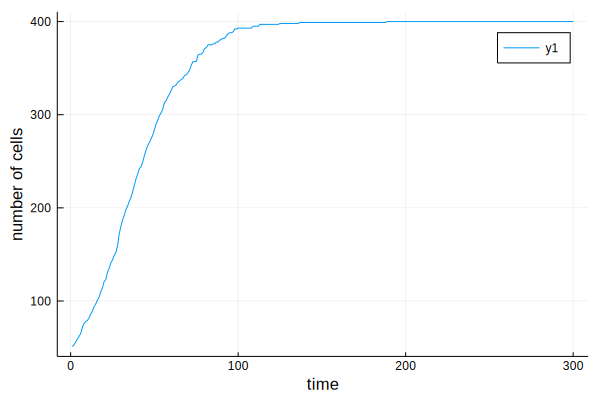

In [29]:
p2 = plot(map(length, cells_T_ID))
xlabel!("time")
ylabel!("number of cells")
display(p2)

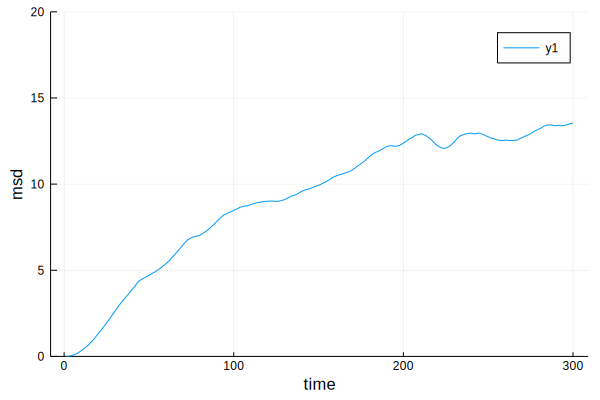

In [30]:
msd_t = BParts.meanSquaredDisplacement(posTime_t_dim_id[:,:,:], arena.bounds);
p = plot(msd_t)
ylims!((0,20))
xlabel!("time")
ylabel!("msd")
display(p)